In [1]:
#Regularize the size of the dataset
#Add some code
#Visualize better

#Add Convnet 
#Add XGBoost (cause it's my favorite and it stays!)

#To lowercase all text before model building
#Bigrams - Change function to subset the text

In [17]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import pickle


In [3]:
#We only import the review_id, stars and text from the review.csv to perform a general text analysis on the data

data = pd.read_csv("E:\\Yelp\\Refined_DATA\\review.csv")
data.head()

,Unnamed: 0,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
2,2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g
3,3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g
4,4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g


In [4]:
data.drop('Unnamed: 0', inplace=True, axis = 1)
data.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g


In [5]:
#Adding a new column
data['text_length'] = data['text'].apply(len)
data.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,text_length
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g,449
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g,317
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g,156
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g,901
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g,165


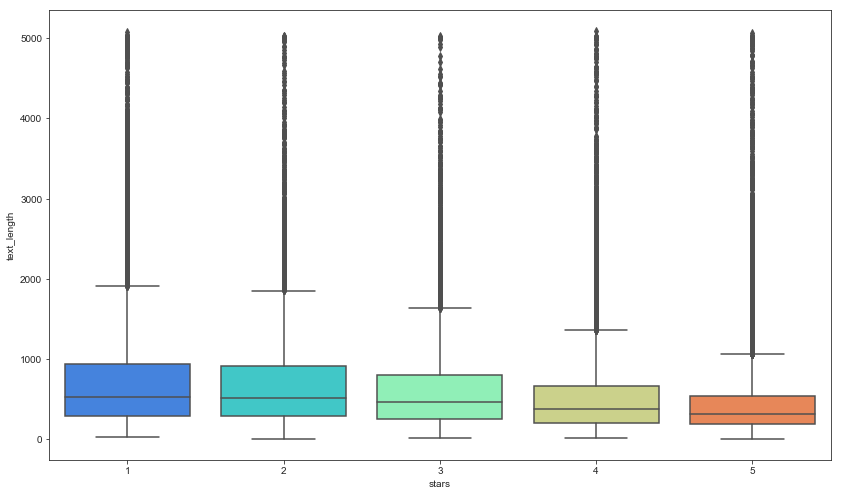

In [6]:
#Drawing some graphs to visualize the distribution of text_length vs stars
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(14, 8.27)
sns.boxplot(x='stars', y='text_length', data=data, palette='rainbow')

In [7]:
#We observe that there is a wide variation in the text length. So text length won't be such a useful feature for our work.
stars = data.groupby('stars').mean()
stars.corr()
#funny is strongly correlated with useful. useful strongly correlated with text length. 
#strong negative correlation between cool and the other three features.

,cool,funny,useful,text_length
cool,1.000000,-0.875657,-0.712477,-0.951408
funny,-0.875657,1.000000,0.951315,0.905406
useful,-0.712477,0.951315,1.000000,0.732253
text_length,-0.951408,0.905406,0.732253,1.000000


# Let's get busy with the real work now!

First we will build a straight model using sklearn's Naive Baye's classifier
Then, we'll go all crazy over it and build a neural net

In [8]:
reviews = data[(data['stars'] == 1) | (data['stars'] == 5)]
reviews.shape
#We have 95919 reviews only considering 1 and 5 star rated reviews! SWEEEET!

(95919, 10)

In [9]:
#Let's get formal and arrange the data into proper X and Y dataframes for easy model building
X = reviews['text']
y = reviews['stars']

In [10]:
X.iloc[0]

'I love this place! My fiance And I go here atleast once a week. The portions are huge! Food is amazing. I love their carne asada. They have great lunch specials... Leticia is super nice and cares about what you think of her restaurant. You have to try their cheese enchiladas too the sauce is different And amazing!!!'

# To build models over text data, we would need to convert it to some numeric represantation/Vector form. We will be using the Bag-of-Words model which is one of the most BASIC methods to keep it quick and easy

In [11]:
#We first split the reviews into individual words to vectorize them.
#We will also remove punctuations and stop words.

def text_process(text):
    #String punctuation provides all the necessary checks
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [12]:
#Example of preprocessing text:
sample = "Hey! This is a text review. This is just an example. Don't go crazy over it!!!!"
print(sample)
print("\nAnd here's what we need:\n");
print(text_process(sample))

Hey! This is a text review. This is just an example. Don't go crazy over it!!!!

And here's what we need:

['Hey', 'text', 'review', 'example', 'Dont', 'go', 'crazy']


# These tokens are also knows as lemmas.
# Now we will vectorize these lemmas so we can feed it to a learning algorithm

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
#We can use Scikit-learn’s CountVectorizer to convert the lemmas to matrix representation
#Add a picture to represent better - We will get a sparse matrix
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)
print("Size of our vocabulary(Dictionary) =", len(bow_transformer.vocabulary_))

Size of our vocabulary(Dictionary) = 133577


In [14]:
#Now that we have built our dictionary, let's vectorize our X Dataframe
X = bow_transformer.transform(X)
print('Shape of Sparse Matrix: ', X.shape)

Shape of Sparse Matrix:  (95919, 133577)


In [15]:
#Splitting our dataset into test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [18]:
#Building a model
model1 = MultinomialNB()
model1.fit(X_train, y_train)
print("Saving the trained model.")
f = open('E:\\Yelp\\model1.pickle', 'wb')
pickle.dump(model1, f)
f.close()

Saving the trained model.


In [19]:
#Making predictions on our model
predictions1 = model1.predict(X_test)

In [20]:
#Evaluating our models using confusion matrix and classification report
print(confusion_matrix(y_test, predictions1), "\n")
print(classification_report(y_test, predictions1))

[[ 4897   470]
 [  604 13213]] 

             precision    recall  f1-score   support

          1       0.89      0.91      0.90      5367
          5       0.97      0.96      0.96     13817

avg / total       0.94      0.94      0.94     19184



Let's test our model on some actual self made reviews. 
Here below I will be writing a short review for Subway! 
I would rate Subway a decent 5.

In [22]:
#sub_review = "This palce serves the best sandwiches I have ever had! The prices are reasonable and the ambience is fine. Nothing too fancy. But the sandwiches and the bun, oh man! They are the best! The best thing is that you can select your toppings and sauces as per your taste. My favorite is the Grilled Chicken Sandwich with a lot of Olives and Celery as topping! Must try!"
sub_review = "McD sucks! The food is garbage and only peasants would love that kinda shit!"
print("Here is the review I wrote on my own: \n", sub_review)
transed_rev = bow_transformer.transform([sub_review])
print("Predicted Rating: ", model1.predict(transed_rev)[0], "Stars");

Here is the review I wrote on my own: 
 McD sucks! The food is garbage and only peasants would love that kinda shit!
Predicted Rating:  1 Stars


# And now, we go all crazy with a ConvNet! 